In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
# Dataframe
import pandas as pd

# Array
import numpy as np
import itertools

# Visualizations
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.colors as colors
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

# Datetime
from datetime import datetime

## Modeling
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from  sklearn.metrics import precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from gensim.models import Word2Vec
from tqdm import tqdm
from sklearn.dummy import DummyClassifier

## Warnings
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

#Sentiment Analysis

In [3]:
data_DM_MI = pd.read_csv('/content/drive/MyDrive/My_DS_FT_1/data_DM_MI.csv')
data_DM_MI.head(2)

,Reviewer_ID,asin,Reviewer_Name,Rating,Unix_Review_Time,Review_Time,Review_Likes,Review_Dislikes,Rating_Category,review_text,Cleaned_Text,POS,Chunk,Year,help_ratio,Rating_Class_Num,Text_Len,Help_Indx,Token
0,A3EBHHCZO6V2A4,5555991584,"Amaranth ""music fan""",5,1158019200,2006-09-12,3,0,good,"Enya's last great album It's hard to believe ""...",enyas last great album hard believe memory tre...,"[('enyas', 'NN'), ('last', 'JJ'), ('great', 'J...",(S\n (NP enyas/NN)\n last/JJ\n great/JJ\n ...,2006,1.0,1,974,helpful,"['enyas', 'last', 'great', 'album', 'hard', 'b..."
1,AZPWAXJG9OJXV,5555991584,bethtexas,5,991526400,2001-06-03,0,0,good,Enya at her most elegant A clasically-styled a...,enya elegant clasicallystyled introvert album ...,"[('enya', 'NN'), ('elegant', 'NN'), ('clasical...",(S\n (NP enya/NN)\n (NP elegant/NN)\n clasi...,2001,0.0,1,599,unhelpful,"['enya', 'elegant', 'clasicallystyled', 'intro..."


In [4]:
df_DM_MI = data_DM_MI[['Reviewer_ID','review_text','Rating_Class_Num','Cleaned_Text','Year','Token']].copy()
df_DM_MI.head()

,Reviewer_ID,review_text,Rating_Class_Num,Cleaned_Text,Year,Token
0,A3EBHHCZO6V2A4,"Enya's last great album It's hard to believe ""...",1,enyas last great album hard believe memory tre...,2006,"['enyas', 'last', 'great', 'album', 'hard', 'b..."
1,AZPWAXJG9OJXV,Enya at her most elegant A clasically-styled a...,1,enya elegant clasicallystyled introvert album ...,2001,"['enya', 'elegant', 'clasicallystyled', 'intro..."
2,A38IRL0X2T4DPF,The best so far I never thought Enya would rea...,1,best far never think enya would reach sublime ...,2003,"['best', 'far', 'never', 'think', 'enya', 'wou..."
3,A22IK3I6U76GX0,Ireland produces good music. This is the third...,1,ireland produce good music third review irish ...,2000,"['ireland', 'produce', 'good', 'music', 'third..."
4,A1AISPOIIHTHXX,"4.5; music to dream to Enya, despite being a s...",1,music dream enya despite successful record art...,2008,"['music', 'dream', 'enya', 'despite', 'success..."


In [5]:
# Splitting the Data Set into Train and Test Sets
X = df_DM_MI['Cleaned_Text']
Y = df_DM_MI['Rating_Class_Num']

In [6]:
# Splitting Dataset into train and test set 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [7]:
# Print train and test set shape
print ('Train Set Shape\t\t:{}\nTest Set Shape\t\t:{}'.format(X_train.shape, X_test.shape))

Train Set Shape		:(56030,)
Test Set Shape		:(18677,)


In [8]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title = 'Confusion matrix',
                          cmap = plt.cm.gist_heat):
    """
    Create a confusion matrix plot for 'good' and 'bad' rating values 
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title, fontsize = 20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize = 20)
    plt.yticks(tick_marks, classes, fontsize = 20)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment = "center", 
                 color = "white" if cm[i, j] < thresh else "black", fontsize = 40)
    
    plt.tight_layout()
    plt.ylabel('True Label', fontsize = 30)
    plt.xlabel('Predicted Label', fontsize = 30)

    return plt

In [9]:
def disp_confusion_matrix(y_pred, model_name, vector = 'CounterVectorizing'):
    """
    Display confusion matrix for selected model with countVectorizer
    """
    cm = confusion_matrix(Y_test, y_pred)
    fig = plt.figure(figsize=(10, 10))
    plot = plot_confusion_matrix(cm, classes=['Bad','Good','Neutral'], normalize=False, 
                                 title = model_name + " " + 'with' + " " + vector + " "+ '\nConfusion Matrix')
    plt.show()

In [10]:
# Create the word vector with CountVectorizer
count_vect = CountVectorizer(ngram_range=(1,1))
count_vect_train = count_vect.fit_transform(X_train)
count_vect_test = count_vect.transform(X_test)

In [11]:
# Print vocabulary length
print('Vocabulary length :', len(count_vect.get_feature_names()))

Vocabulary length : 206775


In [12]:
# Assign feature names of vector into a variable
vocab = count_vect.get_feature_names()

In [13]:
def modeling(Model, Xtrain = count_vect_train, Xtest = count_vect_test):
    """
    This function apply countVectorizer with machine learning algorithms. 
    """
    
    # Instantiate the classifier: model
    model = Model
    
    # Fitting classifier to the Training set (all features)
    model.fit(Xtrain, Y_train)
    
    global y_pred
    # Predicting the Test set results
    y_pred = model.predict(Xtest)
    
    # Assign f1 score to a variable
    score = f1_score(Y_test, y_pred, average = 'weighted')
    
    # Printing evaluation metric (f1-score) 
    print("f1 score: {}".format(score))

##Logistic Regression with CountVectorizer

In [14]:
# Call the modeling function for logistic regression with countvectorizer and print f1 score
modeling(LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg',
                                     class_weight = 'balanced', C = 0.1, n_jobs = -1, random_state = 42))

# Assign y_pred to a variable for further process
y_pred_cv_logreg = y_pred

f1 score: 0.8153670291101476


##Classification Report

In [15]:
# Compute and print the classification report
print(classification_report(Y_test, y_pred_cv_logreg))

              precision    recall  f1-score   support

           0       0.50      0.65      0.56      1523
           1       0.94      0.85      0.89     15251
           2       0.33      0.48      0.39      1903

    accuracy                           0.80     18677
   macro avg       0.59      0.66      0.62     18677
weighted avg       0.84      0.80      0.82     18677



##Confusion Matrix

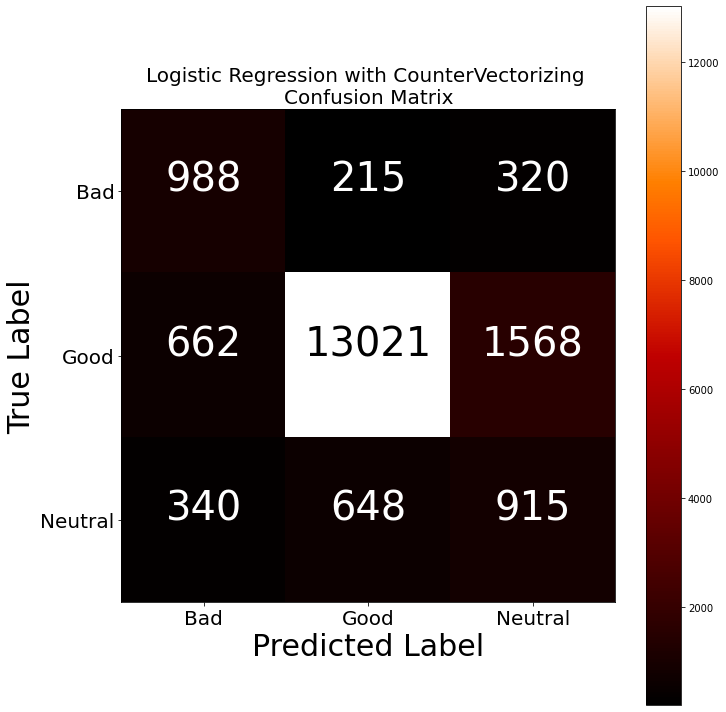

In [16]:
# Print confusion matrix for logistic regression with countvectorizer
disp_confusion_matrix(y_pred_cv_logreg, "Logistic Regression")

## Random Forest with CountVectorizer

In [17]:
# Call the modeling function for random forest classifier with countvectorizer and print f1 score
modeling(RandomForestClassifier(n_estimators = 200, random_state = 42))

# Assign y_pred to a variable for further process
y_pred_cv_rf = y_pred

f1 score: 0.7422531520092842


##Classification Report

In [18]:
# Compute and print the classification report
print(classification_report(Y_test, y_pred_cv_rf))

              precision    recall  f1-score   support

           0       0.96      0.04      0.08      1523
           1       0.82      1.00      0.90     15251
           2       0.50      0.00      0.00      1903

    accuracy                           0.82     18677
   macro avg       0.76      0.35      0.33     18677
weighted avg       0.80      0.82      0.74     18677



##Confusion Matrix

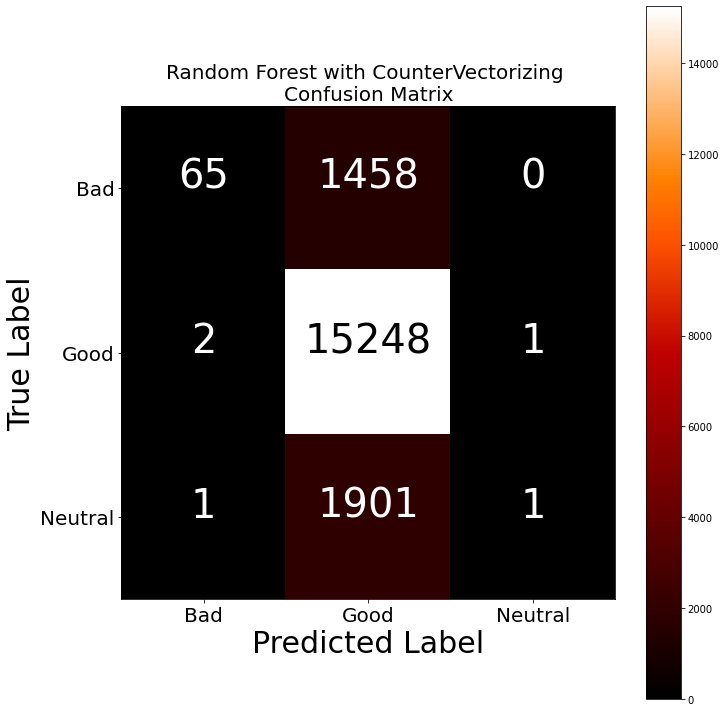

In [19]:
# Print confusion matrix for random forest classifier with countVectorizer
disp_confusion_matrix(y_pred_cv_rf, "Random Forest")

##Comparison of Models with CountVectorizer

In [20]:
# Function for converting the "classification report" results to a dataframe
def pandas_classification_report(y_true, y_pred):
    metrics_summary = precision_recall_fscore_support(
            y_true=y_true, 
            y_pred=y_pred)

    avg = list(precision_recall_fscore_support(
            y_true=y_true, 
            y_pred=y_pred,
            average='weighted'))

    metrics_sum_index = ['precision', 'recall', 'f1-score', 'support']
    class_report_df = pd.DataFrame(
        list(metrics_summary),
        index=metrics_sum_index)

    support = class_report_df.loc['support']
    total = support.sum() 
    avg[-1] = total

    class_report_df['weighted avg'] = avg

    return class_report_df.T

# Function for adding explanatory columns and organizing all dataframe
def comparison_matrix(Y_test, y_pred, label, vector):
    df = pandas_classification_report(Y_test, y_pred)
    df['class']=['bad', 'good','neutral', 'average']
    df['accuracy']= metrics.accuracy_score(Y_test, y_pred)
    df['model'] = label
    df['vectorizer'] = vector
    df = df[['vectorizer', 'model', 'accuracy', 'class', 'precision', 'recall', 'f1-score', 'support']]
    return df

In [21]:
#For loop for using "comparison functions" 

def comparison_table(y_preds, labels):
    
    # empty list for collecting dataframes
    frames_tv = [] 
    
    # list for y_preds
    y_preds_tv = y_preds
    
    # list for labels
    labels_tv = labels  
    
    vector_tv = 'TfidfVectorizer'
    
    for y_pred, label in zip(y_preds_tv, labels_tv):
        df = comparison_matrix(Y_test, y_pred, label, vector_tv)
        frames_tv.append(df)

    # concatenating all dataframes
    global df_tv
    df_tv = pd.concat(frames_tv)
    
    global df_tv2
    df_tv2 = df_tv.set_index(['vectorizer', 'model', 'accuracy', 'class'])

##Function for f1 Score Plotting

In [22]:
def f1_score_bar_plot(df, category, title):
    df = df[df['class']==category]
    x = list(df['model'])
    y = list(df['f1-score'])
    y_round = list(round(df['f1-score'],2))
    a = (list(df['f1-score'])).index(max(list(df['f1-score'])))
    z = (list(df['f1-score'])).index(min(list(df['f1-score'])))
    y_mean = round(df['f1-score'].mean(),2)
    
    plt.rcParams['figure.figsize']=[15,5]
    b_plot = plt.bar(x=x,height=y)
    b_plot[a].set_color('g')
    b_plot[z].set_color('r')
    
    for i,v in enumerate(y_round):
        plt.text(i-.15,0.018,str(v), color='black', fontsize=15, fontweight='bold')
    
    plt.axhline(y_mean,ls='--',color='k',label=y_mean)
    plt.title(title)
    plt.legend()
    
    return plt.show()

##Algorithms Comparison with CountVectorizer

In [23]:
comparison_table(y_preds = [y_pred_cv_logreg, y_pred_cv_rf], 
                labels = ['LogReg', 'Random Forest'])

In [24]:
df_tv2

precision  ...  support
vectorizer      model         accuracy class               ...         
TfidfVectorizer LogReg        0.799058 bad       0.496482  ...   1523.0
                                       good      0.937842  ...  15251.0
                                       neutral   0.326436  ...   1903.0
                                       average   0.839556  ...  18677.0
                Random Forest 0.819939 bad       0.955882  ...   1523.0
                                       good      0.819477  ...  15251.0
                                       neutral   0.500000  ...   1903.0
                                       average   0.798048  ...  18677.0

[8 rows x 4 columns]

##Average f1 Score - Models with CountVectorizer

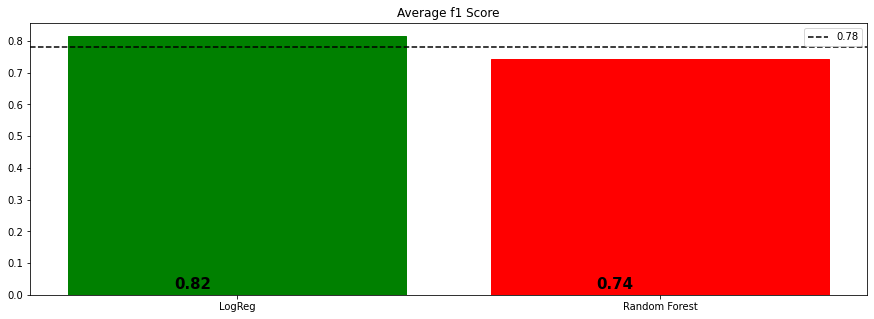

In [25]:
# Plotting f1 score with "f1_score_bar_plot" function
f1_score_bar_plot(df=df_tv, category='average', title= "Average f1 Score")

##TF-IDF

In [26]:
# Create the word vector with TF-IDF Vectorizer
tfidf_vect = TfidfVectorizer(ngram_range=(1, 1))
tfidf_vect_train = tfidf_vect.fit_transform(X_train)
tfidf_vect_test = tfidf_vect.transform(X_test)

## Logistic Regression with TF-IDF

In [38]:
# Call the modeling function for logistic regression with TF-IDF and print f1 score
modeling(LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg', 
                            class_weight = 'balanced', C = 0.1, n_jobs = -1, random_state = 42), 
                            tfidf_vect_train, tfidf_vect_test)

# Assign y_pred to a variable for further process
y_pred_tfidf_logreg = y_pred

f1 score: 0.7879517510417218


##Classification Report

In [28]:
# Compute and print the classification report
print(classification_report(Y_test, y_pred_tfidf_logreg))

              precision    recall  f1-score   support

           0       0.45      0.69      0.55      1523
           1       0.95      0.79      0.86     15251
           2       0.29      0.56      0.38      1903

    accuracy                           0.76     18677
   macro avg       0.56      0.68      0.60     18677
weighted avg       0.84      0.76      0.79     18677



##Confusion Matrix

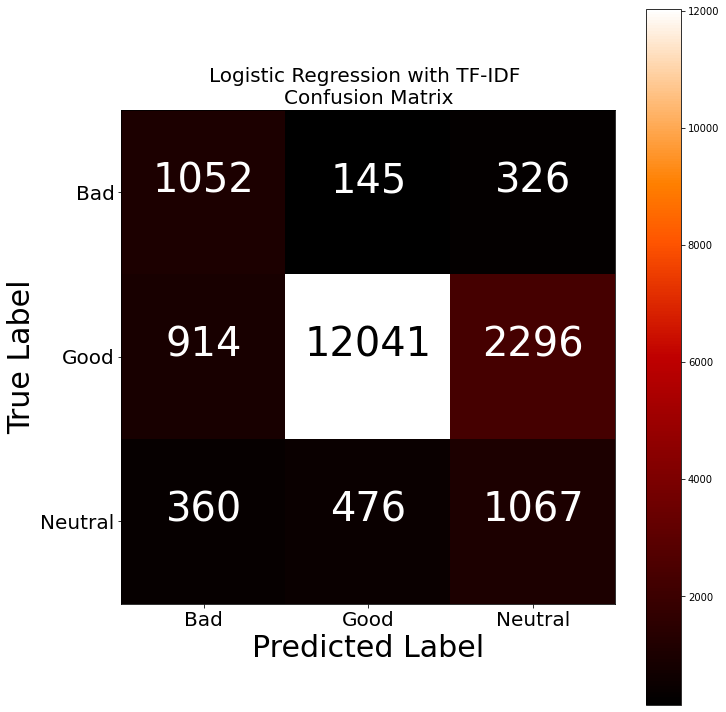

In [29]:
# Print confusion matrix for logistic regression with TF-IDF
disp_confusion_matrix(y_pred_tfidf_logreg, "Logistic Regression", "TF-IDF")

##Random Forest with TF-IDF

In [30]:
# Call the modeling function for random forest classifier with TF-IDF and print f1 score
modeling(RandomForestClassifier(n_estimators = 200, random_state = 42), 
         tfidf_vect_train, tfidf_vect_test)

# Assign y_pred to a variable for further process
y_pred_tfidf_rf = y_pred

f1 score: 0.7406938158039436


##Classification Report

In [31]:
# Compute and print the classification report
print(classification_report(Y_test, y_pred_tfidf_rf))

              precision    recall  f1-score   support

           0       0.98      0.03      0.07      1523
           1       0.82      1.00      0.90     15251
           2       0.50      0.00      0.00      1903

    accuracy                           0.82     18677
   macro avg       0.77      0.34      0.32     18677
weighted avg       0.80      0.82      0.74     18677



##Confusion Matrix

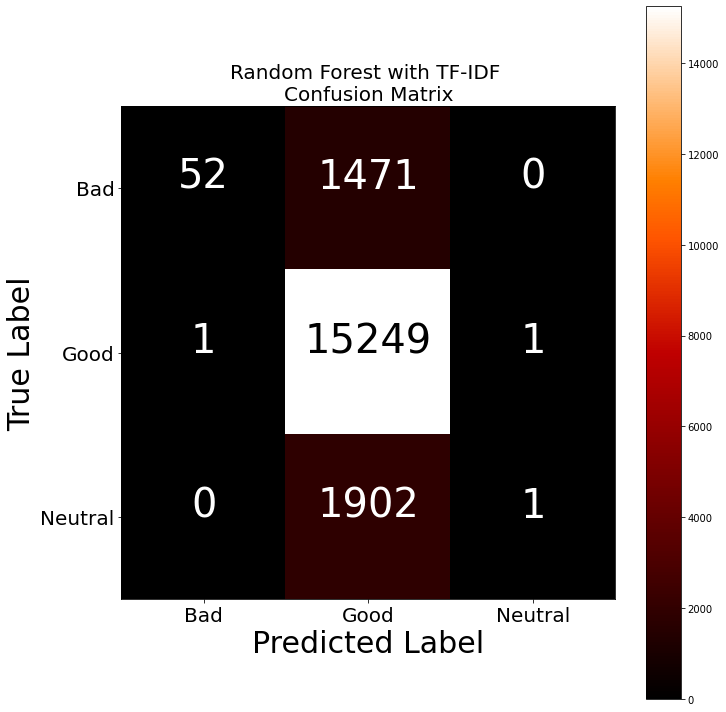

In [32]:
# Print confusion matrix for random forest classifier with TF-IDF
disp_confusion_matrix(y_pred_tfidf_rf, "Random Forest", "TF-IDF")

##Comparision of Models with TF-IDF Vectorizer

In [33]:
comparison_table(y_preds = [y_pred_tfidf_logreg, y_pred_tfidf_rf], 
                labels = ['LogReg', 'Random Forest'])

##Comparison Table - TF-IDF Vectorizing

In [34]:
# Print the comparision matrix
print('\nComparision Matrix of Models with TF-IDF Vectorizer\n')
df_tv2


Comparision Matrix of Models with TF-IDF Vectorizer



precision  ...  support
vectorizer      model         accuracy class               ...         
TfidfVectorizer LogReg        0.758152 bad       0.452279  ...   1523.0
                                       good      0.950956  ...  15251.0
                                       neutral   0.289238  ...   1903.0
                                       average   0.842869  ...  18677.0
                Random Forest 0.819296 bad       0.981132  ...   1523.0
                                       good      0.818870  ...  15251.0
                                       neutral   0.500000  ...   1903.0
                                       average   0.799612  ...  18677.0

[8 rows x 4 columns]

##Average f1 score - Models with TF-IDF Vectorizer

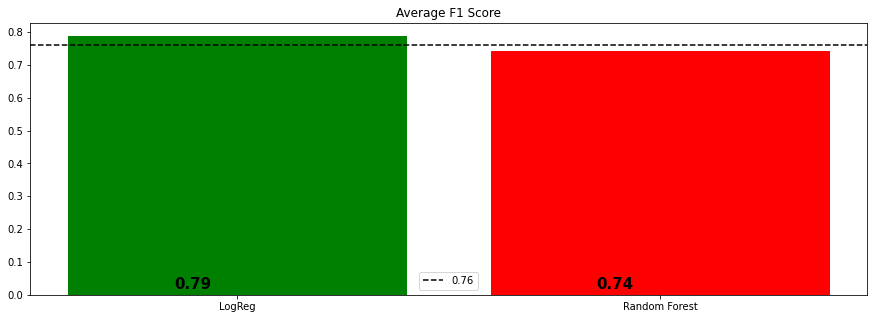

In [35]:
# Plotting f1 score with "f1_score_bar_plot" function
f1_score_bar_plot(df=df_tv, category='average', title= "Average F1 Score")

In [39]:
reviews_new = ['i love the cricket bat', 'Absolutely amazing product', 
              'i love the watch', 'Two thumbs up', 'I was amazed by the product', 
              "do not buy this product",  'i have recived an damaged product']

# use the vocabulary and counts from training data
reviews_new_tfidf = tfidf_vect.transform(reviews_new)

In [40]:
for i in zip(reviews_new,y_pred):
  print(i)

('i love the cricket bat', 1)
('Absolutely amazing product', 1)
('i love the watch', 1)
('Two thumbs up', 1)
('I was amazed by the product', 1)
('do not buy this product', 1)
('i have recived an damaged product', 1)


#Sentiment Score

In [41]:
data_DM_MI = pd.read_csv('/content/drive/MyDrive/My_DS_FT_1/data_DM_MI.csv')
data_DM_MI.head(2)

,Reviewer_ID,asin,Reviewer_Name,Rating,Unix_Review_Time,Review_Time,Review_Likes,Review_Dislikes,Rating_Category,review_text,Cleaned_Text,POS,Chunk,Year,help_ratio,Rating_Class_Num,Text_Len,Help_Indx,Token
0,A3EBHHCZO6V2A4,5555991584,"Amaranth ""music fan""",5,1158019200,2006-09-12,3,0,good,"Enya's last great album It's hard to believe ""...",enyas last great album hard believe memory tre...,"[('enyas', 'NN'), ('last', 'JJ'), ('great', 'J...",(S\n (NP enyas/NN)\n last/JJ\n great/JJ\n ...,2006,1.0,1,974,helpful,"['enyas', 'last', 'great', 'album', 'hard', 'b..."
1,AZPWAXJG9OJXV,5555991584,bethtexas,5,991526400,2001-06-03,0,0,good,Enya at her most elegant A clasically-styled a...,enya elegant clasicallystyled introvert album ...,"[('enya', 'NN'), ('elegant', 'NN'), ('clasical...",(S\n (NP enya/NN)\n (NP elegant/NN)\n clasi...,2001,0.0,1,599,unhelpful,"['enya', 'elegant', 'clasicallystyled', 'intro..."


In [ ]:
data = data_DM_MI[['Reviewer_ID','asin','Rating','Cleaned_Text','Review_Time']].copy()
data.head(2)

,Reviewer_ID,asin,Rating,Cleaned_Text,Review_Time
0,A3EBHHCZO6V2A4,5555991584,5,enyas last great album hard believe memory tre...,2006-09-12
1,AZPWAXJG9OJXV,5555991584,5,enya elegant clasicallystyled introvert album ...,2001-06-03


In [ ]:
counts_cust_id=data['Reviewer_ID'].value_counts()
counts_prod_id=data['asin'].value_counts()

In [ ]:
data=data[data['Reviewer_ID'].isin(counts_cust_id[counts_cust_id >=50].index)]
data=data[data['asin'].isin(counts_prod_id[counts_prod_id >=50].index)]

In [ ]:
data.shape

(2988, 5)

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sent = SentimentIntensityAnalyzer()

polarity = [round(sent.polarity_scores(i)['compound'], 2) for i in data['Cleaned_Text']]
data['sentiment_score'] = polarity
data.head()

,Reviewer_ID,asin,Rating,Cleaned_Text,Review_Time,sentiment_score
88,A3HU0B9XUEVHIM,B00000016W,5,uniquely wonderful still remain brian wilson s...,2011-11-12,0.99
89,A252HNVAZENVNE,B00000016W,5,classic way knoweven classic radio hit like wo...,2003-08-13,0.07
90,A1IKOYZVFHO1XP,B00000016W,5,cool album album originally release still dist...,2005-02-01,0.93
93,A1534MBU6VJXYN,B00000016W,5,would not nice music great do not need rocket ...,2005-09-27,0.94
99,A2TAPL67U2A5HM,B00000016W,4,pet sound pet sound beach boys th studio album...,2009-05-23,0.92


In [ ]:
df = data[['asin','sentiment_score']].copy()
df.shape

(2988, 2)

In [ ]:
df1 = df.groupby(['asin'])['sentiment_score'].mean().sort_values(ascending=False)
print("Top 10 Product IDs based on Sentiment Score")
df1.head(10)

Top 10 Product IDs based on Sentiment Score


asin
B000BOH8XW    0.990000
B000002IRM    0.983333
B00018D5CQ    0.982500
B000002IWQ    0.981667
B0002GMGYA    0.980000
B00001IVJS    0.978750
B000H7JDVI    0.978571
B0012OVF2U    0.978000
B0000025WQ    0.977273
B0000CC6QG    0.976364
Name: sentiment_score, dtype: float64

#Clustering Based on Sentiment Score

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, StandardScaler, FunctionTransformer
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.pipeline import Pipeline

from ipywidgets import interact
import ipywidgets as widgets

import seaborn as sns

##K-Means

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
for col in data.columns:
    if(data[col].dtype == 'object'):
        data[col] = data[col].astype('category')
        data[col] = data[col].cat.codes
X2 = data[["asin","sentiment_score"]]

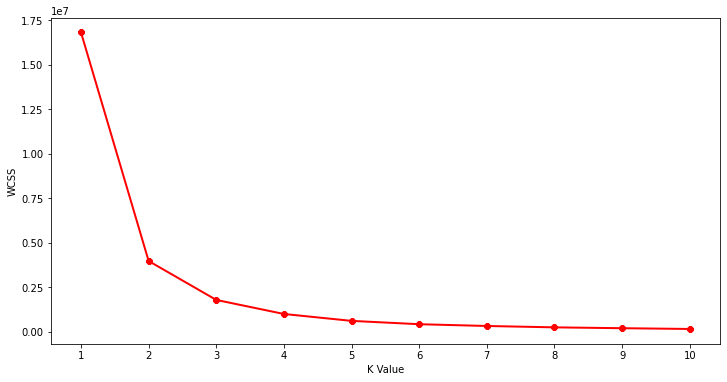

In [ ]:
#Now we calculate the Within Cluster Sum of Squared Errors (WSS) for different values of k.
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [ ]:
scale_columns = ['sentiment_score','asin']#,'Neg_sentiment','Neutral_sentiment']

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df  = X2[scale_columns]
kmeans = KMeans(n_clusters=3,n_init=3).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

print('Attributes used for cluster model: ', scale_columns)

[[  0.76991063 208.87288977]
 [  0.77263965 124.70646221]
 [  0.77970037  38.63389513]]
Attributes used for cluster model:  ['sentiment_score', 'asin']


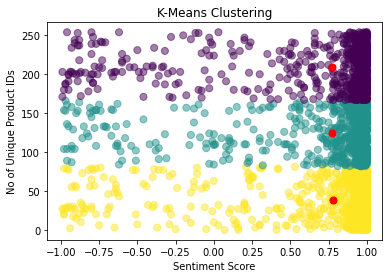

In [ ]:
plt.scatter(df['sentiment_score'], df['asin'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.xlabel('Sentiment Score')
plt.ylabel('No of Unique Product IDs')
plt.title('K-Means Clustering')
plt.show()

##DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
from ipywidgets import interact
import ipywidgets as widgets


def fit_and_plot_clustering(df, clusterer,x,y, print_number=False):
    #df = df.copy()
    df['clusterid'] = clusterer.fit_predict(df[[x, y]])
    n_clusters = df['clusterid'].max() + 1
    n_outliers = np.sum(df['clusterid'] == -1)
    if print_number:
        print(f'number of clusters: {n_clusters}\nnumber of outliers: {n_outliers}')
    cmap = plt.get_cmap('Set1', n_clusters+1)
    ax = df.plot(kind='scatter', x=x, y=y, c='clusterid', cmap=cmap, s=80, colorbar=False)
    ax.grid()
    
    return df
    
style = {'description_width': '150px'}
layout = widgets.Layout(width='400px')


def plot_dbscan(eps = 0.7, min_samples = 20):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    lable_df = fit_and_plot_clustering(data, dbscan,'asin','sentiment_score',  print_number=True)

i = interact(plot_dbscan 
            , eps=widgets.SelectionSlider(options=np.arange(0.1,1.1,0.1), description='Epsilon', layout=layout, style=style, disabled=False,continuous_update=False,orientation='horizontal',readout=True)
            , min_samples=widgets.SelectionSlider(options=range(1, 21), description='Minimum of samples', layout=layout, style=style, disabled=False,continuous_update=False,orientation='horizontal',readout=True)
        );

interactive(children=(SelectionSlider(continuous_update=False, description='Epsilon', layout=Layout(width='400…

##HDBSCAN

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
for col in data.columns:
    if(data[col].dtype == 'object'):
        data[col] = data[col].astype('category')
        data[col] = data[col].cat.codes
X2 = data[["sentiment_score","asin"]].values

In [ ]:
#from sklearn.preprocessing import StandardScaler
#X3=data[["asin","sentiment_score"]].values
#X3 = StandardScaler().fit_transform(X3)


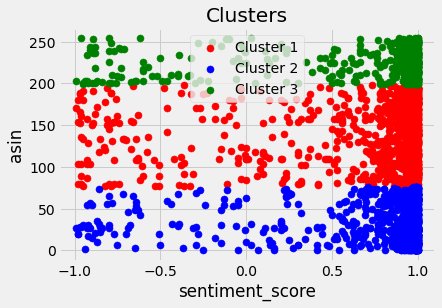

In [ ]:

from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X2)
plt.scatter(X2[y_hc == 0, 0], X2[y_hc == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X2[y_hc == 1, 0], X2[y_hc == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X2[y_hc == 2, 0], X2[y_hc == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.title('Clusters')
plt.xlabel('sentiment_score')
plt.ylabel('asin')
plt.legend()
plt.show()

#Clustering Based on Cleaned Text

In [45]:
# Dataframe
import pandas as pd

# Array
import numpy as np
import itertools

# Visualizations
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.colors as colors
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

# Datetime
from datetime import datetime

## Modeling
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from  sklearn.metrics import precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from gensim.models import Word2Vec
from tqdm import tqdm
from sklearn.dummy import DummyClassifier

## Warnings
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

In [46]:
data_review_MI = pd.read_csv('/content/drive/MyDrive/My_DS_FT_1/data/data_review_MI.csv')
data_review_MI.head(2)

,Reviewer_ID,asin,Reviewer_Name,Rating,Unix_Review_Time,Review_Time,Review_Likes,Review_Dislikes,Rating_Category,review_text,Cleaned_Text,POS,Chunk
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...",5,1393545600,2014-02-28,0,0,good,"good Not much to write about here, but it does...",good not much write exactly suppose filter pop...,"[('good', 'JJ'), ('not', 'RB'), ('much', 'JJ')...",(S\n good/JJ\n not/RB\n much/JJ\n write/RB...
1,A14VAT5EAX3D9S,1384719342,Jake,5,1363392000,2013-03-16,13,1,good,Jake The product does exactly as it should and...,jake product exactly quite affordablei not rea...,"[('jake', 'NN'), ('product', 'NN'), ('exactly'...",(S\n (NP jake/NN)\n (NP product/NN)\n exact...


In [47]:
data_MI = data_review_MI[['Reviewer_ID','asin','Rating','Rating_Category','Cleaned_Text','Review_Time']].copy()
data_MI.head(2)

,Reviewer_ID,asin,Rating,Rating_Category,Cleaned_Text,Review_Time
0,A2IBPI20UZIR0U,1384719342,5,good,good not much write exactly suppose filter pop...,2014-02-28
1,A14VAT5EAX3D9S,1384719342,5,good,jake product exactly quite affordablei not rea...,2013-03-16


In [48]:
# import required sklearn libs
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


# initialize vectorizer
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=0.95)
# fit_transform applies TF-IDF to clean texts - we save the array of vectors in X
X = vectorizer.fit_transform(data_MI['Cleaned_Text'])

# initialize KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
clusters = kmeans.labels_

# initialize PCA with 2 components
pca = PCA(n_components=2, random_state=42)
# pass X to the pca
pca_vecs = pca.fit_transform(X.toarray())
# save the two dimensions in x0 and x1
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]

# assign clusters and PCA vectors to columns in the original dataframe
data_MI['cluster'] = clusters
data_MI['x0'] = x0
data_MI['x1'] = x1


In [49]:
def get_top_keywords(n_terms):
    """This function returns the keywords for each centroid of the KMeans"""
    df = pd.DataFrame(X.todense()).groupby(clusters).mean() # groups the TF-IDF vector by cluster
    terms = vectorizer.get_feature_names_out() # access tf-idf terms
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([terms[t] for t in np.argsort(r)[-n_terms:]])) # for each row of the dataframe, find the n terms that have the highest tf idf score
            
get_top_keywords(20)


Cluster 0
make,tuner,look,easy,nice,get,price,buy,like,one,well,stand,strap,good,use,work,pick,great,guitar,not

Cluster 1
change,try,set,time,get,have,daddario,tune,like,tone,acoustic,last,play,use,good,not,great,guitar,sound,string

Cluster 2
effect,make,buy,power,need,no,quality,one,like,price,work,get,good,amp,use,great,not,sound,cable,pedal


In [50]:
data_MI.head()

,Reviewer_ID,asin,Rating,Rating_Category,Cleaned_Text,Review_Time,cluster,x0,x1
0,A2IBPI20UZIR0U,1384719342,5,good,good not much write exactly suppose filter pop...,2014-02-28,0,-0.077513,-0.005319
1,A14VAT5EAX3D9S,1384719342,5,good,jake product exactly quite affordablei not rea...,2013-03-16,0,-0.065742,0.015709
2,A195EZSQDW3E21,1384719342,5,good,job well primary job device block breath would...,2013-08-28,0,-0.066513,0.030376
3,A2C00NNG1ZQQG2,1384719342,5,good,good windscreen money nice windscreen protect ...,2014-02-14,0,-0.057301,0.055395
4,A94QU4C90B1AX,1384719342,5,good,no pop record vocals pop filter great look per...,2014-02-21,2,-0.082637,-0.014416


In [51]:
cluster_map = {0: "cluster1", 1: "cluster2", 2: "cluster3"} # mapping found through get_top_keywords
data_MI['cluster'] = data_MI['cluster'].map(cluster_map)

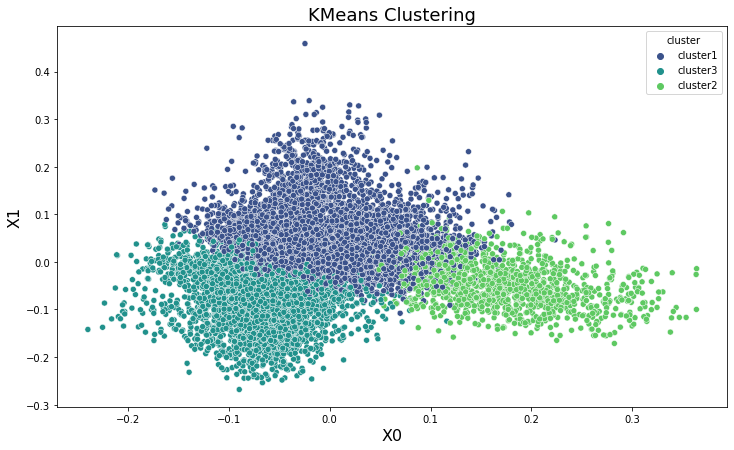

In [53]:
# set image size
plt.figure(figsize=(12, 7))
# set title
plt.title("KMeans Clustering", fontdict={"fontsize": 18})
# set axes names
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
#  create scatter plot with seaborn, where hue is the class used to group the data
sns.scatterplot(data=data_MI, x='x0', y='x1', hue='cluster', palette="viridis")
plt.show()